In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import time
import importlib

In [2]:
import sys
sys.path.append("../../../libs_bell")
from lib_preprocessing import job_ids_to_result, flatten_results_jobs_list, arrange_results_list_tensored3, results_list_to_hist_list

In [3]:
with open("pkls/raw_hist_list.pkl", "rb") as f:
    raw_hist_list = pickle.load(f)
with open("pkls/results_meas_cal.pkl", "rb") as f:
    results_meas_cal = pickle.load(f)

In [4]:
from libs_qrem import NationEtalFilter
from qiskit.ignis.mitigation.measurement import TensoredMeasFitter

In [5]:
max_size = 65
max_length = 64
nation_lu_mitigator_list = []
for n in range(2, max_size + 1):
    mit_pattern = [[i] for i in range(n)]
    meas_fitter = TensoredMeasFitter(results_meas_cal[n - 1], mit_pattern=mit_pattern)
    nation_lu_mitigator_list.append(NationEtalFilter(n, meas_fitter.cal_matrices))
    if n % 10 == 0:
        print("size", n, "finished")
print("length of nation_lu_mitigator_list: ", len(nation_lu_mitigator_list))

size 10 finished
size 20 finished
size 30 finished
size 40 finished
size 50 finished
size 60 finished
length of nation_lu_mitigator_list:  64


In [6]:
for i in range(max_length):
    t1 = time.perf_counter()
    _ = nation_lu_mitigator_list[i].apply(raw_hist_list[i + 1], method="lu")
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 0.00016558400000121765 s )
2 th finished ( 3 qubits, 9.577099999980021e-05 s )
3 th finished ( 4 qubits, 0.00020277499999998838 s )
4 th finished ( 5 qubits, 0.00024290100000001758 s )
5 th finished ( 6 qubits, 0.0004660999999988036 s )
6 th finished ( 7 qubits, 0.0007432930000010884 s )
7 th finished ( 8 qubits, 0.0009859959999989343 s )
8 th finished ( 9 qubits, 0.0016763459999999952 s )
9 th finished ( 10 qubits, 0.0030197810000007763 s )
10 th finished ( 11 qubits, 0.004230689999999981 s )
11 th finished ( 12 qubits, 0.008338373999999149 s )
12 th finished ( 13 qubits, 0.011298234999999934 s )
13 th finished ( 14 qubits, 0.01710608399999991 s )
14 th finished ( 15 qubits, 0.024189971999998505 s )
15 th finished ( 16 qubits, 0.030253312999999338 s )
16 th finished ( 17 qubits, 0.06343812200000087 s )
17 th finished ( 18 qubits, 0.09300851699999946 s )
18 th finished ( 19 qubits, 0.12156247899999961 s )
19 th finished ( 20 qubits, 0.16045801099999935 s )
20 

In [7]:
nation_lu_mitigator_info = []
for i in range(max_length):
    t1 = time.perf_counter()
    # _ = nation_lu_mitigator_list[i].apply(raw_hist_list[i + 1])
    nation_lu_mitigator_info.append({"exact_one_norm_of_inv_reduced_A": nation_lu_mitigator_list[i].exact_one_norm_of_inv_reduced_A(),
                                     "iterative_one_norm_of_inv_reduced_A": nation_lu_mitigator_list[i].iterative_one_norm_of_inv_reduced_A(method="lu"),
                                     "mitigated_hist": nation_lu_mitigator_list[i].mitigated_hist(),
                                     "x_s": nation_lu_mitigator_list[i].x_s(),
                                     "x_hat": nation_lu_mitigator_list[i].x_hat(),
                                     "x_tilde": nation_lu_mitigator_list[i].x_tilde(),
                                     "sum_of_x": nation_lu_mitigator_list[i].sum_of_x(),
                                     "sum_of_x_hat": nation_lu_mitigator_list[i].sum_of_x_hat(),
                                     "sum_of_x_tilde": nation_lu_mitigator_list[i].sum_of_x_tilde(),
                                     "indices_to_keys_vector": nation_lu_mitigator_list[i].indices_to_keys_vector(),
                                     "times": nation_lu_mitigator_list[i].times(),
                                     "expval": nation_lu_mitigator_list[i].expval(),
                                     "mitigation_stddev": nation_lu_mitigator_list[i].mitigation_stddev(norm_type = "exact"),
                                     })
    t2 = time.perf_counter()
    print(i + 1, "th finished (", i + 2, "qubits,", t2 - t1, "s )")

1 th finished ( 2 qubits, 0.00011759799997435039 s )
2 th finished ( 3 qubits, 0.00011032999998406012 s )
3 th finished ( 4 qubits, 0.00011874900002339928 s )
4 th finished ( 5 qubits, 0.00012925099997573852 s )
5 th finished ( 6 qubits, 0.0002858020000076067 s )
6 th finished ( 7 qubits, 0.0007926920000045357 s )
7 th finished ( 8 qubits, 0.0015964529999905608 s )
8 th finished ( 9 qubits, 0.0031659459999673345 s )
9 th finished ( 10 qubits, 0.006959999000002881 s )
10 th finished ( 11 qubits, 0.01075081399994815 s )
11 th finished ( 12 qubits, 0.01831756100000348 s )
12 th finished ( 13 qubits, 0.029356756000026962 s )
13 th finished ( 14 qubits, 0.051737602999992305 s )
14 th finished ( 15 qubits, 0.08394943000001831 s )
15 th finished ( 16 qubits, 0.10823817900001131 s )
16 th finished ( 17 qubits, 0.24731713300002411 s )
17 th finished ( 18 qubits, 0.3447545369999716 s )
18 th finished ( 19 qubits, 0.4905249859999685 s )
19 th finished ( 20 qubits, 0.655486719999999 s )
20 th fini

In [8]:
with open("./pkls/nation_lu_mitigator_info.pkl", "wb") as f:
    pickle.dump(nation_lu_mitigator_info, f)

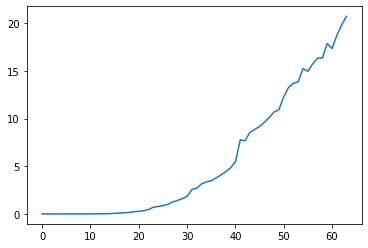

In [9]:
plt.plot([nation_lu_mitigator_list[i].times()["total"] for i in range(max_length)])